## Exploration of Emammal Camera Data
### @dalisaydavid
#### The goal of this notebook is to work with the members of the Emammal team to see what kinds of new data visualizations are possible using their public data and Python's graphing capabilities.
_____

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Import emammal observation data for a subset of their data. This CSV only has data from a few emammal projects.

In [2]:
df = pd.read_csv('observations.csv')

/Users/david.dalisay/.local/share/virtualenvs/david.dalisay-ezru0VKg-/Users/david.dalisay/.pyenv/shims/python/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Project,Subproject,Treatment,Deployment Name,ID Type,Deployment ID,Sequence ID,Begin Time,End Time,Species Name,Common Name,Age,Sex,Individual,Count,Actual Lat,Actual Lon,Fuzzed
0,Fresno Mammals Project,Fresno Urban Mammals,NaN,Yard 3(W.Twain Ave),Researcher,d27706,d27706s1,2017-06-29T09:22:59,2017-06-29T09:23:29,Camera Trapper,Camera Trapper,Unknown,Unknown,NaN,1,36.43835,-119.49055,False
1,Fresno Mammals Project,Fresno Urban Mammals,NaN,Yard 3(W.Twain Ave),Researcher,d27706,d27706s10,2017-07-01T07:18:25,2017-07-01T07:19:05,Canis familiaris,Domestic Dog,Unknown,Unknown,NaN,1,36.43835,-119.49055,False
2,Fresno Mammals Project,Fresno Urban Mammals,NaN,Yard 3(W.Twain Ave),Researcher,d27706,d27706s100,2017-07-20T09:47:31,2017-07-20T09:47:35,Canis familiaris,Domestic Dog,Unknown,Unknown,NaN,1,36.43835,-119.49055,False
3,Fresno Mammals Project,Fresno Urban Mammals,NaN,Yard 3(W.Twain Ave),Researcher,d27706,d27706s101,2017-07-20T09:51:16,2017-07-20T09:51:20,Canis familiaris,Domestic Dog,Unknown,Unknown,NaN,1,36.43835,-119.49055,False
4,Fresno Mammals Project,Fresno Urban Mammals,NaN,Yard 3(W.Twain Ave),Researcher,d27706,d27706s102,2017-07-20T20:25:22,2017-07-20T20:25:26,Canis familiaris,Domestic Dog,Unknown,Unknown,NaN,1,36.43835,-119.49055,False


### Derive a couple fields and clean a couple fields for future analysis.

In [197]:
df['Begin Date'] = df.apply(lambda row: datetime.strptime(row['Begin Time'], '%Y-%m-%dT%H:%M:%S').date(), axis=1)

In [339]:
df['Begin Month Year'] = df.apply(lambda row: datetime.strptime(row['Begin Time'], '%Y-%m-%dT%H:%M:%S').strftime('%y-%m'), axis=1)

df['Begin Year'] = df.apply(lambda row: datetime.strptime(row['Begin Time'], '%Y-%m-%dT%H:%M:%S').strftime('%Y'), axis=1)



In [199]:
df_cleaned_dates = df[df['Begin Time'] > '1964-01-01'].reset_index()

In [217]:
df_count_per_species = df_cleaned_dates.groupby(['Common Name']).count().reset_index()
df_count_per_species.head()

,Common Name,index,Project,Subproject,Treatment,Deployment Name,ID Type,Deployment ID,Sequence ID,Begin Time,...,Species Name,Age,Sex,Individual,Count,Actual Lat,Actual Lon,Fuzzed,Begin Date,Begin Month Year
0,American Badger,32,32,32,0,32,32,32,32,32,...,32,32,32,0,32,32,32,32,32,32
1,American Beaver,8,8,8,0,8,8,8,8,8,...,8,8,8,0,8,8,8,8,8,8
2,American Black Bear,28,28,28,0,28,28,28,28,28,...,28,28,28,0,28,28,28,28,28,28
3,American Hog-nosed Skunk,32,32,32,0,32,32,32,32,32,...,32,32,32,0,32,32,32,32,32,32
4,American Red Squirrel,4,4,4,0,4,4,4,4,4,...,4,4,4,0,4,4,4,4,4,4


### Get a count of occurences per species and month-year.

In [207]:
df_count_per_month_year_species = df_cleaned_dates.groupby(['Common Name', 'Begin Month Year']).count().reset_index()
df_count_per_month_year_species.head()

,Common Name,Begin Month Year,index,Project,Subproject,Treatment,Deployment Name,ID Type,Deployment ID,Sequence ID,...,End Time,Species Name,Age,Sex,Individual,Count,Actual Lat,Actual Lon,Fuzzed,Begin Date
0,American Badger,16-04,1,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
1,American Badger,16-05,4,4,4,0,4,4,4,4,...,4,4,4,4,0,4,4,4,4,4
2,American Badger,17-03,2,2,2,0,2,2,2,2,...,2,2,2,2,0,2,2,2,2,2
3,American Badger,17-04,7,7,7,0,7,7,7,7,...,7,7,7,7,0,7,7,7,7,7
4,American Badger,18-05,4,4,4,0,4,4,4,4,...,4,4,4,4,0,4,4,4,4,4


### Get counts over time for the Red Fox, American Beaver, American Black Bear, and American Badger.

In [202]:
df_red_fox_per_month_year = df_count_per_month_year_species[df_count_per_month_year_species['Common Name'] == 'Red Fox']
df_american_beaver_per_month_year = df_count_per_month_year_species[df_count_per_month_year_species['Common Name'] == 'American Beaver']
df_american_black_bear_per_month_year = df_count_per_month_year_species[df_count_per_month_year_species['Common Name'] == 'American Black Bear']
df_american_badger_per_month_year = df_count_per_month_year_species[df_count_per_month_year_species['Common Name'] == 'American Badger']

### Visualization 1: Compare shape of occurences per species across several sites.

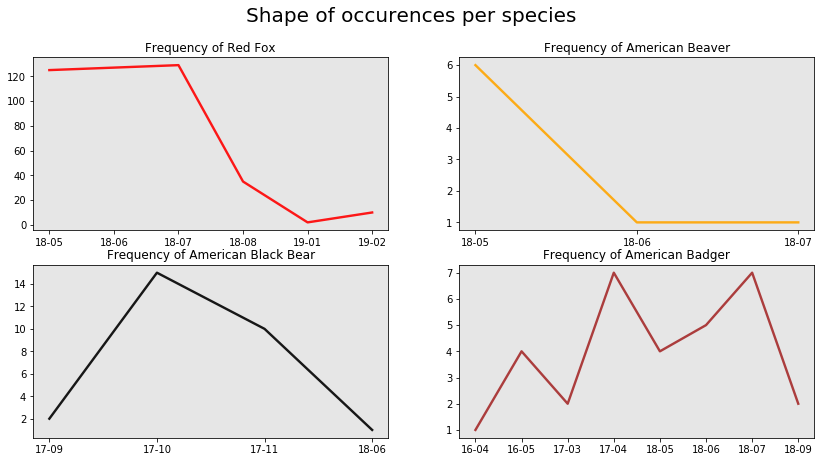

In [203]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,7))
plt.suptitle("Shape of occurences per species", fontsize=20, fontweight=0, color='black')

ax[0,0].set_title('Frequency of Red Fox')
ax[0,0].plot(df_red_fox_per_month_year['Begin Month Year'], df_red_fox_per_month_year['Project'], linewidth=2.4, alpha=0.9, color='red')
ax[0,0].set_facecolor((.9, .9, .9))

ax[0,1].set_title('Frequency of American Beaver')
ax[0,1].plot(df_american_beaver_per_month_year['Begin Month Year'], df_american_beaver_per_month_year['Project'], linewidth=2.4, alpha=0.9, color='orange')
ax[0,1].set_facecolor((.9, .9, .9))

ax[1,0].set_title('Frequency of American Black Bear')
ax[1,0].plot(df_american_black_bear_per_month_year['Begin Month Year'], df_american_black_bear_per_month_year['Project'], linewidth=2.4, alpha=0.9, color='black')
ax[1,0].set_facecolor((.9, .9, .9))

ax[1,1].set_title('Frequency of American Badger')
ax[1,1].plot(df_american_badger_per_month_year['Begin Month Year'], df_american_badger_per_month_year['Project'], linewidth=2.4, alpha=0.9, color='brown')
ax[1,1].set_facecolor((.9, .9, .9))

### Get number of unique species per project. Then filter for the Fresno Mammals Project, for example.

In [222]:
df_count_unique_species_per_project_date = df_cleaned_dates.groupby(['Project', 'Begin Date'])['Common Name'].nunique().reset_index()

In [223]:
df_count_unique_species_per_project_date.head()

,Project,Begin Date,Common Name
0,Fresno Mammals Project,2012-01-01,4
1,Fresno Mammals Project,2012-01-02,3
2,Fresno Mammals Project,2012-01-03,1
3,Fresno Mammals Project,2012-01-04,3
4,Fresno Mammals Project,2012-01-05,1


In [244]:
df_fresno_mammals_project = df_count_unique_species_per_project_date[(df_count_unique_species_per_project_date['Project'] == 'Fresno Mammals Project') & (df_count_unique_species_per_project_date['Begin Date'] > datetime.strptime('2016-01-01', '%Y-%m-%d').date())]

In [245]:
df_fresno_mammals_project.head()

,Project,Begin Date,Common Name
26,Fresno Mammals Project,2016-06-14,1
27,Fresno Mammals Project,2016-07-18,5
28,Fresno Mammals Project,2016-07-19,5
29,Fresno Mammals Project,2016-07-20,5
30,Fresno Mammals Project,2016-07-21,5


### Visualization 2: Plot species richness per day. Species richness, in this case, is just a count of unique species.

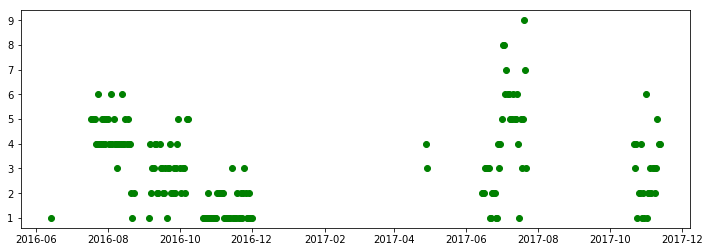

In [264]:
import random
plt.figure(figsize=(12, 4))
plt.plot(df_fresno_mammals_project['Begin Date'], df_fresno_mammals_project['Common Name'], 'go')

### Because counts are discrete, it's hard to find a pattern in the count of species richness over a period of time. Let's plot this on a bar graph and jitter the values with random noise to avoid overplotting.

<BarContainer object of 174 artists>

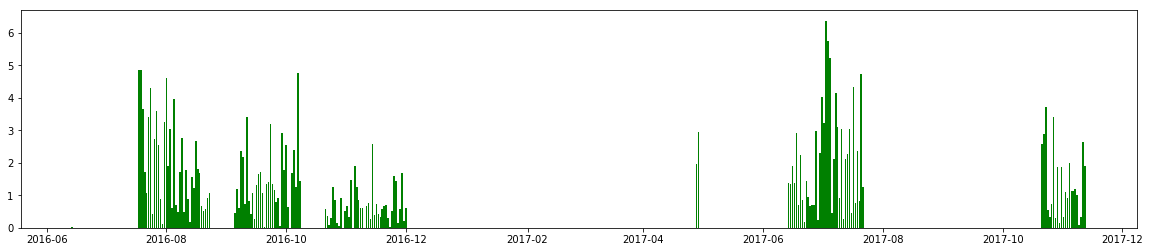

In [272]:
plt.figure(figsize=(20,4))
plt.bar(df_fresno_mammals_project['Begin Date'], map(lambda row: row*random.uniform(0,1), df_fresno_mammals_project['Common Name']), color='green')

Let's look at August 2016 to December 2016 to have a more "complete sample" of data in this chart.

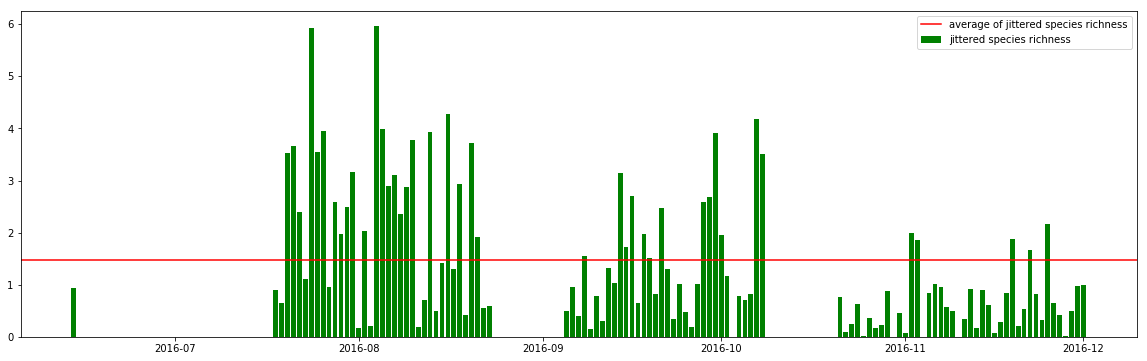

In [300]:
plt.figure(figsize=(20,6))
df_fresno_2016 = df_fresno_mammals_project[df_fresno_mammals_project['Begin Date'] < datetime.strptime('2017-01-01', '%Y-%m-%d').date()]
df_fresno_2016_jittered = map(lambda row: row*random.uniform(0,1), df_fresno_2016['Common Name'])
plt.bar(df_fresno_2016['Begin Date'], df_fresno_2016_jittered, color='green', label='jittered species richness')
plt.axhline(y=np.mean(df_fresno_2016_jittered), color='r', linestyle='-', label='average of jittered species richness')
plt.legend()

### This doesn't tell us much, but it does tell us that the mean species richness gravitates towards a value that's between 1 and 2. It makes sense that, on average, there is no more than 2 sightings a day.

In [348]:
df_count_per_species_per_year = df.groupby(['Common Name', 'Begin Year']).count().reset_index()[['Common Name', 'Begin Year', 'Project']]

In [350]:
df_count_per_species_per_year['n_times_n_minus_1'] = df_count_per_species_per_year.apply(lambda row: row['Project']*(row['Project']-1), axis=1)

In [351]:
df_count_per_species_per_year.head()

,Common Name,Begin Year,Project,n_times_n_minus_1
0,American Badger,2016,5,20
1,American Badger,2017,9,72
2,American Badger,2018,18,306
3,American Beaver,2018,8,56
4,American Black Bear,2017,27,702


In [366]:
df_sum_little_n = df_count_per_species_per_year.groupby(['Begin Year'])['n_times_n_minus_1'].sum().reset_index()

In [359]:
df_sum_big_n = df_count_per_species_per_year.groupby(['Begin Year'])['Project'].sum().reset_index()

In [360]:
df_sum_big_n['big_n_times_big_n_minus_1'] = df_sum_big_n.apply(lambda row: row['Project']*(row['Project']-1), axis=1)

In [362]:
df_sum_big_n

,Begin Year,Project,big_n_times_big_n_minus_1
0,1963,1,0
1,2012,207,42642
2,2014,38,1406
3,2015,20,380
4,2016,7663,58713906
5,2017,2404,5776812
6,2018,41221,1699129620
7,2019,489,238632


In [370]:
df_simpson_index = pd.merge(df_sum_little_n, df_sum_big_n, on='Begin Year', how='inner')

In [375]:
df_simpson_index = df_simpson_index.drop(df_simpson_index.index[0])

In [378]:
df_simpson_index['simpson_index'] = df_simpson_index.apply(lambda row: row['n_times_n_minus_1']/float(row['big_n_times_big_n_minus_1']), axis=1) 

In [379]:
df_simpson_index

,Begin Year,n_times_n_minus_1,Project,big_n_times_big_n_minus_1,simpson_index
1,2012,23792,207,42642,0.557948
2,2014,170,38,1406,0.120910
3,2015,34,20,380,0.089474
4,2016,16742440,7663,58713906,0.285153
5,2017,419236,2404,5776812,0.072572
6,2018,364183932,41221,1699129620,0.214336
7,2019,44726,489,238632,0.187427


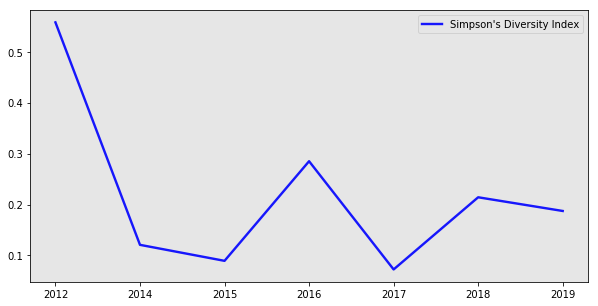

In [389]:
fig = plt.figure(figsize=(10,5))
plt.rcParams['axes.facecolor'] = (.9, .9, .9)
plt.plot(df_simpson_index['Begin Year'], df_simpson_index['simpson_index'], linewidth=2.4, alpha=0.9, color='blue', label='Simpson\'s Diversity Index')
plt.legend()

In [12]:
date_picker = widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

display(date_picker)

DatePicker(value=None, description=u'Pick a Date')

In [14]:
date_picker.value

datetime.date(2019, 6, 4)

<IPython.core.display.Javascript object>


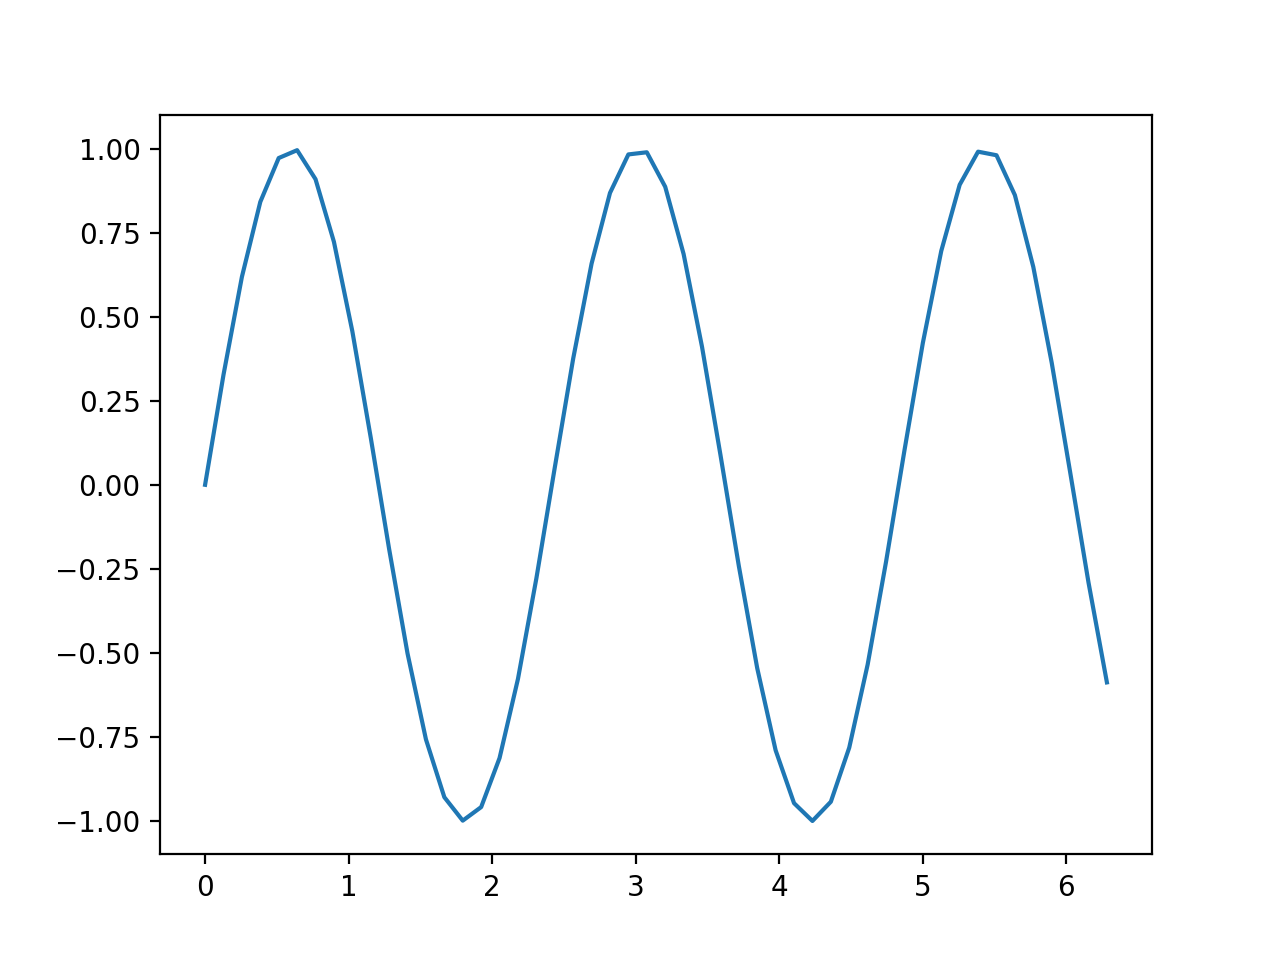

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSd3JywgbWF4PTMuMCwgbWluPS0xLjApLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSfigKY=


<function __main__.update>

In [16]:
%matplotlib notebook
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update)